In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from tqdm import tqdm
from scipy.optimize import curve_fit

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks')

c:\program files\python36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python36\lib\site-packages\numpy\.libs\libopenblas.BNVRK7633HSX7YVO2TADGR4A5KEKXJAW.gfortran-win_amd64.dll
c:\program files\python36\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


Text(0,0.5,'$f$($x$; $x_0$, $\\gamma$)')

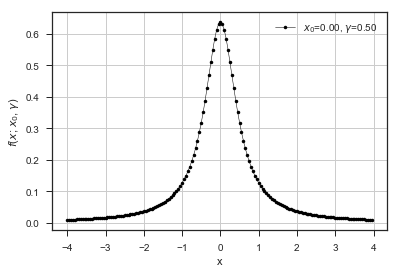

In [3]:
def lorentzian_pdf(x, x0, gamma, c=0):
    if gamma <= 0:
        return 0
    return 1/(np.pi*gamma*(1+((x-x0)/gamma)**2)) + c

x = np.arange(-4, 4, 0.05)


x0 = 0
gamma = 0.5
c = 0
y = lorentzian_pdf(x, x0, gamma, c)

#plt.figure(figsize=(10,10))
plt.plot(x, y, '.-', linewidth=0.5, marker='.', color='black', label='$x_0$=%.2f, $\gamma$=%.2f' % (x0, gamma))
plt.legend()
plt.grid()

plt.xlabel('x')
plt.ylabel('$f$($x$; $x_0$, $\gamma$)')

# Lorentzian plots

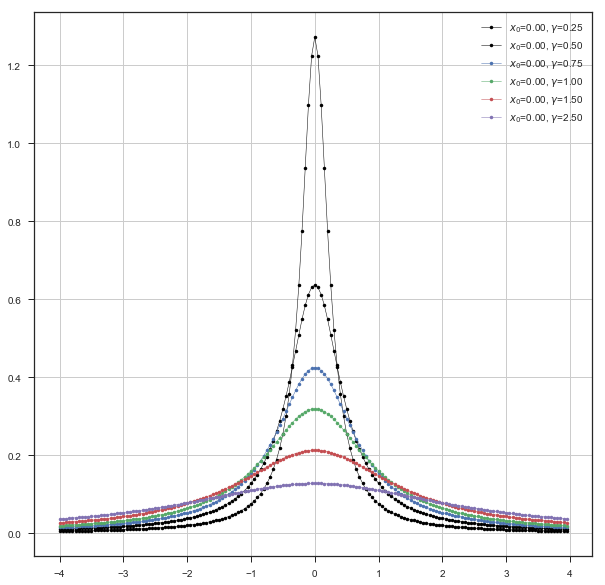

In [4]:
plt.figure(figsize=(10,10))

gamma = 0.25
y = lorentzian_pdf(x, x0, gamma, c)
plt.plot(x, y, '.-', linewidth=0.5, marker='.', color='black', label='$x_0$=%.2f, $\gamma$=%.2f' % (x0, gamma))


gamma = 0.5
y = lorentzian_pdf(x, x0, gamma, c)
plt.plot(x, y, '.-', linewidth=0.5, marker='.', color='black', label='$x_0$=%.2f, $\gamma$=%.2f' % (x0, gamma))

gamma = 0.75
y = lorentzian_pdf(x, x0, gamma, c)
plt.plot(x, y, '.-', linewidth=0.5, marker='.', label='$x_0$=%.2f, $\gamma$=%.2f' % (x0, gamma))


gamma = 1.0
y = lorentzian_pdf(x, x0, gamma, c)
plt.plot(x, y, '.-', linewidth=0.5, marker='.', label='$x_0$=%.2f, $\gamma$=%.2f' % (x0, gamma))

gamma = 1.5
y = lorentzian_pdf(x, x0, gamma, c)
plt.plot(x, y, '.-', linewidth=0.5, marker='.', label='$x_0$=%.2f, $\gamma$=%.2f' % (x0, gamma))

gamma = 2.5
y = lorentzian_pdf(x, x0, gamma, c)
plt.plot(x, y, '.-', linewidth=0.5, marker='.', label='$x_0$=%.2f, $\gamma$=%.2f' % (x0, gamma))

plt.grid()
plt.legend()

In [5]:
# Test fit

Text(0,0.5,'$-f$($x$; $x_0$, $\\gamma$)')

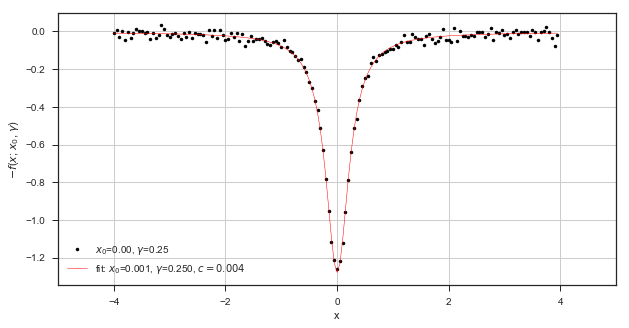

In [6]:
plt.figure(figsize=(10,5))


# maak exacte lorentziaan pdf
gamma = 0.25
y = lorentzian_pdf(x, x0, gamma, c)
#plt.plot(x, y, '.-', linewidth=0.5, marker='.', color='black', label='$x_0$=%.2f, $\gamma$=%.2f' % (x0, gamma))

# Voeg er ruis aan toe
ynoise = 0.02*np.random.normal(size=x.size)
ydata = y+ynoise


# fit het signaal met ruis
popt, pcov = curve_fit(lorentzian_pdf, x, ydata, bounds=(0, [3,3,3]))


# plot punten
plt.plot(x, -ydata, '.', linewidth=0.5, marker='.', color='black', label='$x_0$=%.2f, $\gamma$=%.2f' % (x0, gamma))

# plot fit
plt.plot(x, -lorentzian_pdf(x, *popt), 'r-', linewidth=0.5,  label='fit: $x_0$=%5.3f, $\gamma$=%5.3f, $c=%5.3f$' % tuple(popt))
plt.legend()

plt.xlim((-5,5))

plt.grid()

plt.xlabel('x')
plt.ylabel('$-f$($x$; $x_0$, $\gamma$)')

# Test plot meerdere lorentziaantjes

Fit nu 2 lorentziaantjes op een parabool

Text(0,0.5,'Relative intensity $I$ [-]')

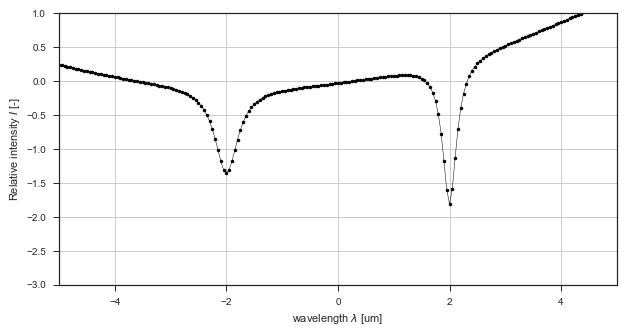

In [7]:
def lorentzian_pdf_2(x, x00, gamma0, x01, gamma1, a, b, c):

    y = lorentzian_pdf(x=x, x0=x00, gamma=gamma0) + lorentzian_pdf(x=x, x0=x01, gamma=gamma1) - a*x**2 - b*x +c

    return -y

x = np.arange(-15, 15, 0.05)


gamma0 = 0.25
gamma1 = 0.15
x00 = -2
x01 = 2

n = 2
c = 0
a = 0.03
b = 0.1
c = 0

y = lorentzian_pdf_2(x, x00, gamma0, x01, gamma1, a, b, c)


# plot punten
plt.figure(figsize=(10,5))
plt.plot(x, y, '.-', color='black', linewidth=0.5)
plt.xlim((-5,5))
plt.ylim((-3, 1))
plt.grid()

plt.xlabel('wavelength $\lambda$ [um]')
plt.ylabel('Relative intensity $I$ [-]')

#plt.savefig('double_lorentzian_dip.png', dpi=300)

# Fit multiple lorentz

-4.014072208319097 0.804576879896261 3.992318672929372 0.7876655773373009 0.0005327776300493658 0.004980074210693264 0.0038846324446215564


Text(0,0.5,'$f$($x$; $x_0$, $\\gamma$)')

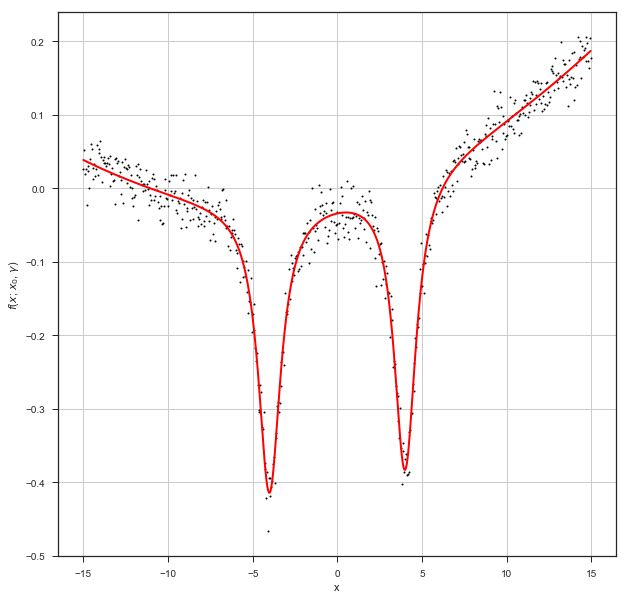

In [8]:
plt.figure(figsize=(10,10))


# maak exacte lorentziaan pdf
x00 = -4
gamma0 = 0.8

x01 = 4
gamma1 = 0.8


a = 0.0005
b = 0.0050
c = 0


n = 2

x = np.arange(-15, 15, 0.05)
y = lorentzian_pdf_2(x, x00, gamma0, x01, gamma1, a,b,c)

plt.plot(x, y, '.', linewidth=0.5, marker='.', ms=0.1, color='black', label='$x_0$=%.2f, $\gamma$=%.2f' % (x0, gamma))

# Voeg er ruis aan toe
ynoise = 0.02*np.random.normal(size=x.size)
ydata = y +ynoise


# fit het signaal met ruis
#popt, pcov = curve_fit(lorentzian_pdf_2, x, ydata, bounds=([-50 for _ in range(7)], [10 for _ in range(7)])) # range 7 voor 7 variabelen

parguess = (-5, 0.5, 5, 0.5, 0,0,0) # parameter values guess

popt, pcov = curve_fit(f=lorentzian_pdf_2, xdata=x, ydata=ydata, p0=parguess)


# plot punten
plt.plot(x, ydata, '.', marker='.', ms=4, color='black')

# plot fit
yfit = lorentzian_pdf_2(x, *popt)

#print(x)
#*variabelen = *popt

print(*popt)

plt.plot(x, yfit, 'r-', linewidth=2)

plt.grid()
#plt.legend()

plt.xlabel('x')
plt.ylabel('$f$($x$; $x_0$, $\gamma$)')

In [9]:
rx00, rgamma00, rx01, rgamma01, ra, rb, rc = tuple(popt)

In [10]:
def lorentzian_differentiated(x, x0, gamma, c=0):
    """
    lorentziaan gedifferentieerd naar x
    """
    y = -(2*gamma*(x-x0)) / np.pi*(gamma**2+(x-x0)**2)**2
    return y

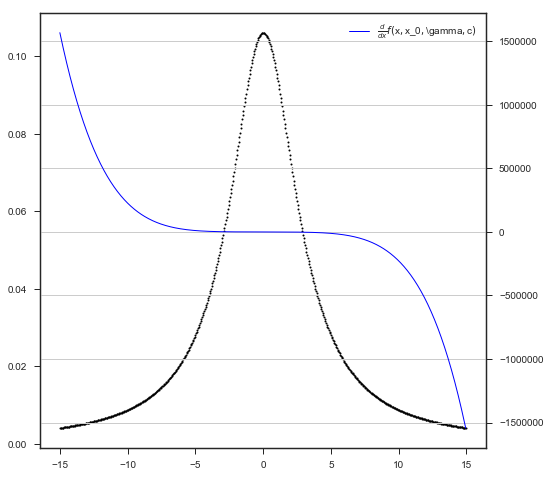

In [11]:
# maak data

x1 = 0
gamma1 = 3

x = np.arange(-15, 15, 0.05)
y1 = lorentzian_pdf(x, x1, gamma1)
y2 = lorentzian_differentiated(x, x1, gamma1)

# plot data

fig, ax1 = plt.subplots(figsize=((8,8)))



ax1.plot(x, y1, '.', linewidth=0.5, marker='.', ms=4, color='black', label='$x_0$=%.2f, $\gamma$=%.2f' % (x0, gamma))


ax2 = ax1.twinx()
ax2.plot(x, y2, '-', linewidth=1, color='blue', label=r'$\frac{d}{dx} f($x$, $x_0$, $\gamma$, $c$)$')


plt.legend()

plt.grid()

In [12]:
top = lorentzian_pdf(x1, x1, gamma1)
print(top)

0.1061032953945969


In [13]:
half_top = top/2
half_top

0.05305164769729845

In [14]:
x1, gamma1

(0, 3)

In [15]:
def FWHM(x0, gamma): 
    yhalf_top = lorentzian_pdf(x0, x0, gamma1) / 2 # helft van de y waarde van de top 
    print("yhalf_top: ",yhalf_top)
    x1 = gamma * np.sqrt( (1/(yhalf_top))*(1/(np.pi*gamma)) -1) + x0
    return 2*x1

In [16]:
FWHM(x1, gamma1)

yhalf_top:  0.05305164769729845


6.0

# 8 lorentzians

In [17]:
def lorentzian_pdf_8(x, x00, gamma0, x01, gamma1, x02, gamma2, x03, gamma3, x04, gamma4, x05, gamma5, x06, gamma6, x07, gamma7, a, b, c):

    y = lorentzian_pdf(x=x, x0=x00, gamma=gamma0) + lorentzian_pdf(x=x, x0=x01, gamma=gamma1) + lorentzian_pdf(x=x, x0=x02, gamma=gamma2) + lorentzian_pdf(x=x, x0=x03, gamma=gamma3) + lorentzian_pdf(x=x, x0=x04, gamma=gamma4) + lorentzian_pdf(x=x, x0=x05, gamma=gamma5)+ lorentzian_pdf(x=x, x0=x06, gamma=gamma6)+ lorentzian_pdf(x=x, x0=x07, gamma=gamma7)  - a*x**2 - b*x +c

    return -y

-15.005214315656989 0.10090033701340237 -11.00084171227887 0.10159965460388755 -8.001436496419302 0.09724687517883442 -4.000026202486929 0.09831528783537241 -0.0025389714583161946 0.09743952733008994 3.9987744463831807 0.09895459822391915 7.997650084331773 0.10099271728288381 12.001668850635722 0.09835534216151764 0.029997313517320462 0.0997542458378325 -14.99961030476697


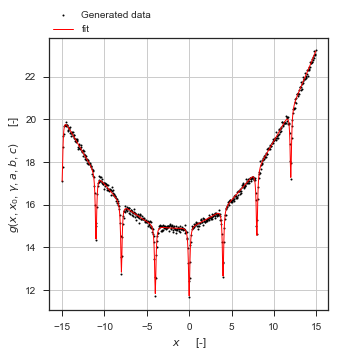

In [18]:
plt.figure(figsize=(5,5))


# maak exacte lorentziaan pdf
x00 = -15
gamma0 = 0.1

x01 = -11
gamma1 = 0.1


x02 = -8
gamma2 = 0.1


x03 = -4
gamma3 = 0.1


x04 = 0
gamma4 = 0.1


x05 = 4
gamma5 = 0.1

x06 = 8
gamma6 = 0.1

x07 = 12
gamma7 = 0.1

a = 0.03
b = 0.1
c = -15


n = 2

x = np.arange(-15, 15, 0.05)
y = lorentzian_pdf_8(x, x00, gamma0, x01, gamma1, x02, gamma2, x03, gamma3 , x04, gamma4 , x05, gamma5, x06, gamma6, x07, gamma7, a,b,c)

#plt.plot(x, y, '.', linewidth=0.5, marker='.', ms=0.1, color='black', label='Generated data with $x_0$=%.2f, $\gamma$=%.2f, $a$=%.2f, $b$=%.2f, $c$=%.2f' % (x0, gamma, a, b, c))

# Voeg er ruis aan toe
ynoise = 0.1*np.random.normal(size=x.size)
ydata = y +ynoise


# fit het signaal met ruis
#popt, pcov = curve_fit(lorentzian_pdf_2, x, ydata, bounds=([-50 for _ in range(7)], [10 for _ in range(7)])) # range 7 voor 7 variabelen

parguess = (-15, 0.1, -11, 0.1, -8, 0.1, -4, 0.1, 0, 0.1, 4, 0.1, 8, 0.1, 12, 0.1, 0,0,0) # parameter values guess

popt, pcov = curve_fit(f=lorentzian_pdf_8, xdata=x, ydata=ydata, p0=parguess)


# plot punten
plt.plot(x, ydata, '.', marker='.', ms=4, color='black', label='Generated data') # with $x_0$=%.2f, $\gamma$=%.2f, $a$=%.2f, $b$=%.2f, $c$=%.2f' % (x0, gamma, a, b, c))

# plot fit
yfit = lorentzian_pdf_8(x, *popt)

#print(x)
#*variabelen = *popt

print(*popt)

plt.plot(x, yfit, 'r-', linewidth=1, label='fit')

plt.grid()
plt.legend(loc=(0,1), frameon=False)

plt.xlabel('$x$ $\quad$ [-]')
plt.ylabel('$g$($x$, $x_0$, $\gamma$, $a$, $b$, $c$) $\quad$ [-]')


plt.savefig("figuren\\lorentz_opbouw_test_fit.png", dpi=300)

In [19]:
# guessing params

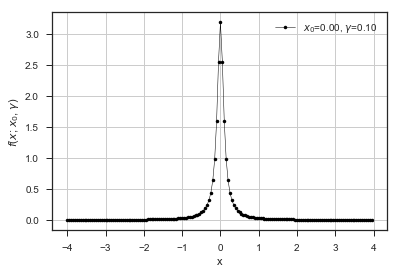

In [20]:
def lorentzian_pdf(x, x0, gamma, c=0):
    if gamma <= 0:
        return 0
    return 1/(np.pi*gamma*(1+((x-x0)/gamma)**2)) + c

x = np.arange(-4, 4, 0.05)


x0 = 0
gamma = 0.1
c = 0
y = lorentzian_pdf(x, x0, gamma, c)

#plt.figure(figsize=(10,10))
plt.plot(x, y, '.-', linewidth=0.5, marker='.', color='black', label='$x_0$=%.2f, $\gamma$=%.2f' % (x0, gamma))
plt.legend()
plt.grid()

plt.xlabel('x')
plt.ylabel('$f$($x$; $x_0$, $\gamma$)')

plt.savefig("figuren\\lorentz.png", dpi=300)